# Finding ORI in genome
Based on chapter *Where in the genome does DNA replication begin* from book **Bioinformatics Algorithms An active learning approach**

## Brief biological background
*Ori* (Origin of replication) is place in genome where DNA replication begins. Finding ori helps in understanding cells replication as well as may be used in genome therapy (or in other medical applications). Length of typical ori is about 500 nucleotides.

There exists short nucleotide segments acting as binding boxes for mediatory proteins during replication. It is expected that there will be many such sites within ori. Binding segments are different across species!

During replication DNA is unwinded and both strands are replicated independently. However individual strands are unidirectional hence the process is assymetric. One strand can be copied in one go, whereas second is replicated in smaller chunks known as Okazaki fragments.


For more detailed information please refer to [book](#http://bioinformaticsalgorithms.com/) or [Coursera course](#https://www.coursera.org/learn/dna-analysis?specialization=bioinformatics).

Assumption for rest of notebook: There is single ori in genome

## Computational methods

### Finding DNA binding sites within *ori*

The most straightfoward way of finding binding segments is to check of how many times each kmer appear in ori (*FrequentWords* problem).

Improvement to this approach is to count occurrences not only in given DNA but also in its reverse-complement strand.

Another enhancement is to allow mismatches between kmers.

### Finding clumps

If binding boxes had been the same across species, it would be possible to find regions in genome containing many such boxes (probable *ori*s). Unfortunately it is not the case nut instead groups of any kmer occurring many times can be found.

Kmer can be called *(L-t)-clump* in genome if there is region (substring) of length *L* in which kmer appears at least *t* times. 

### Finding approximate *ori* location
Due to assymetry of replication, one strand spends more time waiting to be used as template. Single stranded DNA has much more higher mutation ratio (C mutates into T so initial pair G=C becomes (invalid) G=T which is finally repaired to T=A). 

As a consequence of both facts, there is decreased number of G on one strand. Calculating running difference between number of G and C produces *skew* plot, which minimum vlaue is approximate location of *ori*.

Skew plot for *E.Coli*
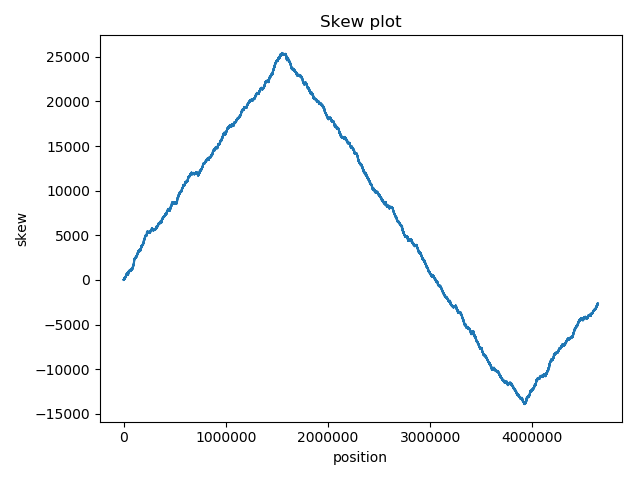

## Examples

Import used packages

In [80]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from baal import utils
from baal import motifs

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Finding DNA boxes in *Vibrio cholerae*

In [55]:
vibrio = utils.get_genome('vibrio_cholerae_ori')

from_k = 3
to_k = 10

Check most frequent kmers in Vibrio Cholreae ORI

In [56]:
freq_kmers = [motifs.frequent_kmers(vibrio, k) for k in range(from_k, to_k)]
most_freq_vibrio = pd.DataFrame(freq_kmers, index=range(from_k, to_k), columns=['kmers', 'count'])
most_freq_vibrio # the same results as on page 10 in book

,kmers,count
3,{TGA},25
4,{ATGA},12
5,"{GATCA, TGATC}",8
6,{TGATCA},8
7,{ATGATCA},5
8,{ATGATCAA},4
9,"{ATGATCAAG, TCTTGATCA, CTCTTGATC, CTTGATCAT}",3


Check also reverse complement strand 

In [57]:
motifs.frequent_kmers(vibrio, 9, reverse=True) # same as on page 12

({'ATGATCAAG', 'CTTGATCAT'}, 6)

In [92]:
motifs.frequent_kmers(vibrio, 9, 1, reverse=True)

({'ATGATCATG',
  'CATGATCAA',
  'CATGATCAT',
  'TCATGATCA',
  'TGATCATGA',
  'TTGATCATG'},
 10)

And with obne allowed mismatch

### Finding DNA boxes in *Thermatoga petrophilia*

In [52]:
thermo = utils.get_genome('thermotoga_petrophila')

from_k = 3
to_k = 10

In [53]:
motifs.frequent_kmers(thermo, 9)

({'ACCTACCAC'}, 5)

In [54]:
motifs.frequent_kmers(thermo, 9, reverse=True)

({'ACCTACCAC', 'GTGGTAGGT'}, 7)

Binding boxes for *Vibrio cholerae* and *Thermatoga petrophilia* are different!

### Find clumps in *E. coli*

In [60]:
ecoli = utils.get_genome('e_coli')

4639675

In [77]:
ecoli_clumps = motifs.find_clumps(ecoli, 9, 500, 9)
ecoli_clumps

{'ATCCCCGCT',
 'CCCCGCTGG',
 'CCCGCTGGC',
 'CCGCTGGCG',
 'CGCGGGGAA',
 'CGCTGGCGC',
 'CGGGGAACT',
 'CGGTTTATC',
 'CTGGCGCGG',
 'GCGCGGGGA',
 'GCGGGGAAC',
 'GCTGGCGCG',
 'GGCGCGGGG',
 'GGGGAACTC',
 'GGTTTATCC',
 'GTTTATCCC',
 'TATCCCCGC',
 'TCCCCGCTG',
 'TGGCGCGGG',
 'TTATCCCCG',
 'TTTATCCCC'}

### Finding ori in *E. coli*

Take a look at skew diagram to find probable location

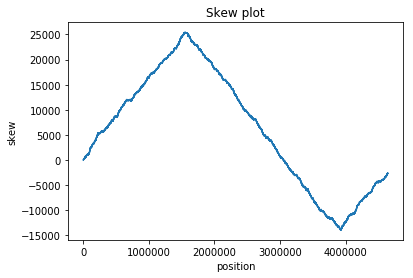

In [81]:
motifs.plot_skew(ecoli)

In [82]:
motifs.get_min_skew_position(ecoli)

[3923620, 3923621, 3923622, 3923623]

Extract 500 nucleotides long sequence starting at minimum skew location

In [89]:
ecoli_ori_start = 3923620
ecoli_ori_end = ecoli_ori_start + 500
ecoli_prob_ori = ecoli[ecoli_ori_start:ecoli_ori_end]

500

Check if exists any frequent 9-mer

In [91]:
motifs.frequent_kmers(ecoli_prob_ori, 9, reverse=True)

({'AAGATCAAC',
  'AAGGATCCG',
  'AGATCAACA',
  'AGGATCCGG',
  'AGTTATCCA',
  'CTGTGGATA',
  'GATCCCAGC',
  'GCTGGGATC',
  'GTGGATAAC',
  'GTTATCCAC',
  'GTTGATCTT',
  'TATCCACAG',
  'TGGATAACT',
  'TGTGGATAA',
  'TGTTGATCT',
  'TTATCCACA'},
 2)

Unfortunately, most frequently occurring 9-mers appears only twice. Maybe allowing mismatches helps?

In [93]:
motifs.frequent_kmers(ecoli_prob_ori, 9, 1, reverse=True)

({'AAGAGATCT',
  'AAGGATCCT',
  'AATGATCCG',
  'AGAACAACA',
  'AGATCTCTT',
  'AGCTGGGAT',
  'AGGATCAAC',
  'AGGATCCTT',
  'ATCCCAGCT',
  'CAGAAGATC',
  'CCAGGATCC',
  'CGGATCATT',
  'CTGGGATCA',
  'CTGTTGATC',
  'GATCAACAG',
  'GATCCCAGC',
  'GATCTTCTG',
  'GCTGGGATC',
  'GGATCCTGG',
  'GGTTATCCA',
  'GTGGATAAC',
  'GTTATCCAC',
  'GTTGATCCT',
  'TCTGGATAA',
  'TGATCAACA',
  'TGATCCCAG',
  'TGGATAACC',
  'TGTGAATAA',
  'TGTGGATAA',
  'TGTTGATCA',
  'TGTTGTTCT',
  'TTATCCACA',
  'TTATCCAGA',
  'TTATTCACA'},
 4)

In [94]:
ecoli_prob_ori

'AATGATGATGACGTCAAAAGGATCCGGATAAAACATGGTGATTGCCTCGCATAACGCGGTATGAAAATGGATTGAAGCCCGGGCCGTGGATTCTACTCAACTTTGTCGGCTTGAGAAAGACCTGGGATCCTGGGTATTAAAAAGAAGATCTATTTATTTAGAGATCTGTTCTATTGTGATCTCTTATTAGGATCGCACTGCCCTGTGGATAACAAGGATCCGGCTTTTAAGATCAACAACCTGGAAAGGATCATTAACTGTGAATGATCGGTGATCCTGGACCGTATAAGCTGGGATCAGAATGAGGGGTTATACACAACTCAAAAACTGAACAACAGTTGTTCTTTGGATAACTACCGGTTGATCCAAGCTTCCTGACAGAGTTATCCACAGTAGATCGCACGATCTGTATACTTATTTGAGTAAATTAACCCACGATCCCAGCCATTCTTCTGCCGGATCTTCCGGAATGTCGTGATCAAGAATGTTGATCTTCAGTG'

### Check running time

In [ ]:
%timeit motifs.frequent_kmers(vibrio, 3)